# Tipos de datos

In [1]:
import seaborn as sns

# Cargamos el dataset de tips con la función load_dataset de seaborn y lo guardamos en df
df = sns.load_dataset('tips')

# Mostramos el tipo de dato utilizando el método dtypes de pandas
print("Tipo de dato para cada columna:")
print(df.dtypes)

Tipo de dato para cada columna:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [2]:
# El método head() de pandas nos permite visualizar las primeras filas del dataset
print('Primeras 10 filas del dataset:\n')
print(df.head(10))

# Alternativamente podemos utilizar el método tail() de pandas para visualizar las últimas filas del dataset
print('\nUltimas 10 filas del dataset:\n')
print(df.tail(10))

Primeras 10 filas del dataset:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

Ultimas 10 filas del dataset:

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


# Describir datos


In [4]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [5]:
print(df.describe(include='all'))

        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


In [6]:
print(df['day'].mode()) # Metodo para sacar la moda de una columna categorica
print(df['day'].value_counts()) # Metodo para sacar la frecuencia de cada valor en una columna categorica

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


# Algunos gráficos

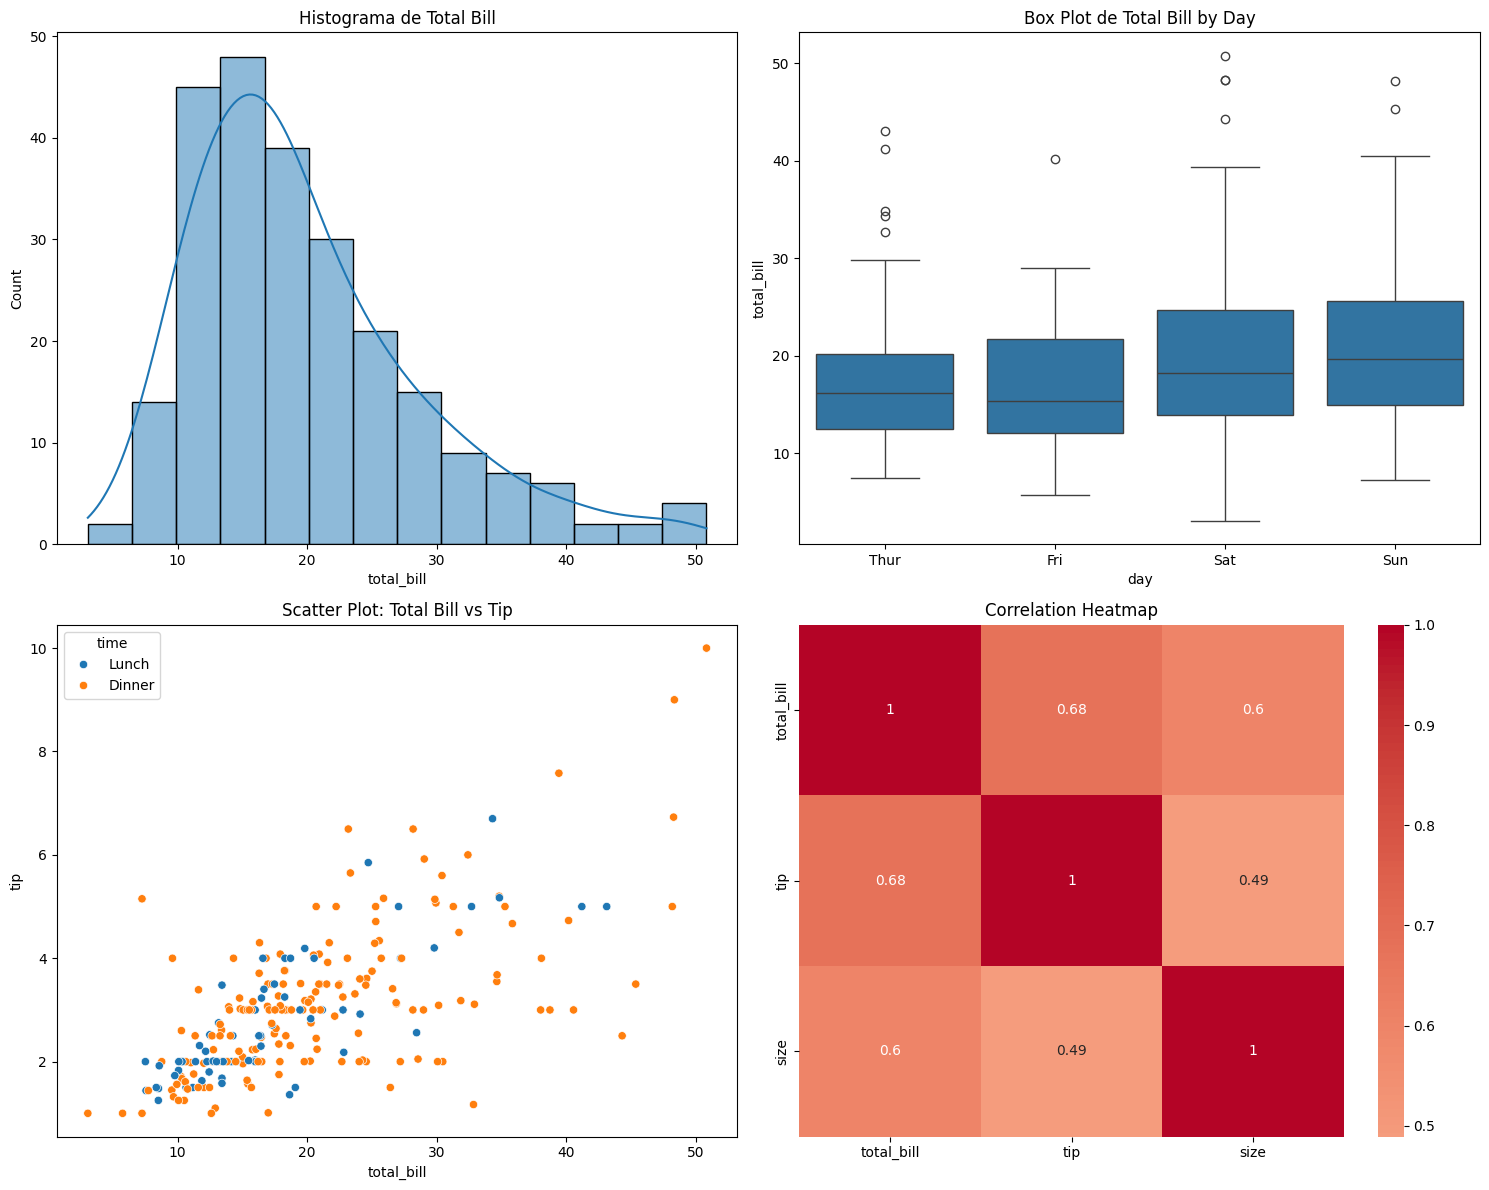

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma de total_bill
sns.histplot(data=df, x='total_bill', kde=True, ax=axes[0,0])
axes[0,0].set_title('Histograma de Total Bill')

# 2. Box plot de total_bill by day
sns.boxplot(data=df, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Box Plot de Total Bill by Day')

# 3. Scatter plot de total_bill vs tip
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', ax=axes[1,0])
axes[1,0].set_title('Scatter Plot: Total Bill vs Tip')

# 4. Heatmap of correlation matrix
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Outliers

In [8]:
import numpy as np
from scipy import stats

# 1. IQR 
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Metodo IQR:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
outliers_iqr = df[df['total_bill'].apply(lambda x: x < lower_bound or x > upper_bound)]
print(f"Numero de outliers: {len(outliers_iqr)}")
print("Outliers:", sorted(outliers_iqr['total_bill'].values), "\n")

# 2. 3 SD
mean = df['total_bill'].mean()
std = df['total_bill'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

print("Método de 3 SD:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
outliers_std = df[df['total_bill'].apply(lambda x: x < lower_bound or x > upper_bound)]
print(f"Numero de outliers: {len(outliers_std)}")
print("Outliers:", sorted(outliers_std['total_bill'].values), "\n")

# 3. Puntuaciones Z
z_scores = stats.zscore(df['total_bill'])
outliers_z = df[abs(z_scores) > 3]

print("Z-score Method:")
print(f"Number of outliers: {len(outliers_z)}")
print("Outlier values:", sorted(outliers_z['total_bill'].values))

Metodo IQR:
Lower bound: -2.82
Upper bound: 40.30
Numero de outliers: 9
Outliers: [np.float64(40.55), np.float64(41.19), np.float64(43.11), np.float64(44.3), np.float64(45.35), np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)] 

Método de 3 SD:
Lower bound: -6.92
Upper bound: 46.49
Numero de outliers: 4
Outliers: [np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)] 

Z-score Method:
Number of outliers: 4
Outlier values: [np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)]


Numero de valores perdidos por columna:
total_bill    27
tip           37
sex           19
smoker        22
day           26
time          27
size          23
dtype: int64


<Axes: >

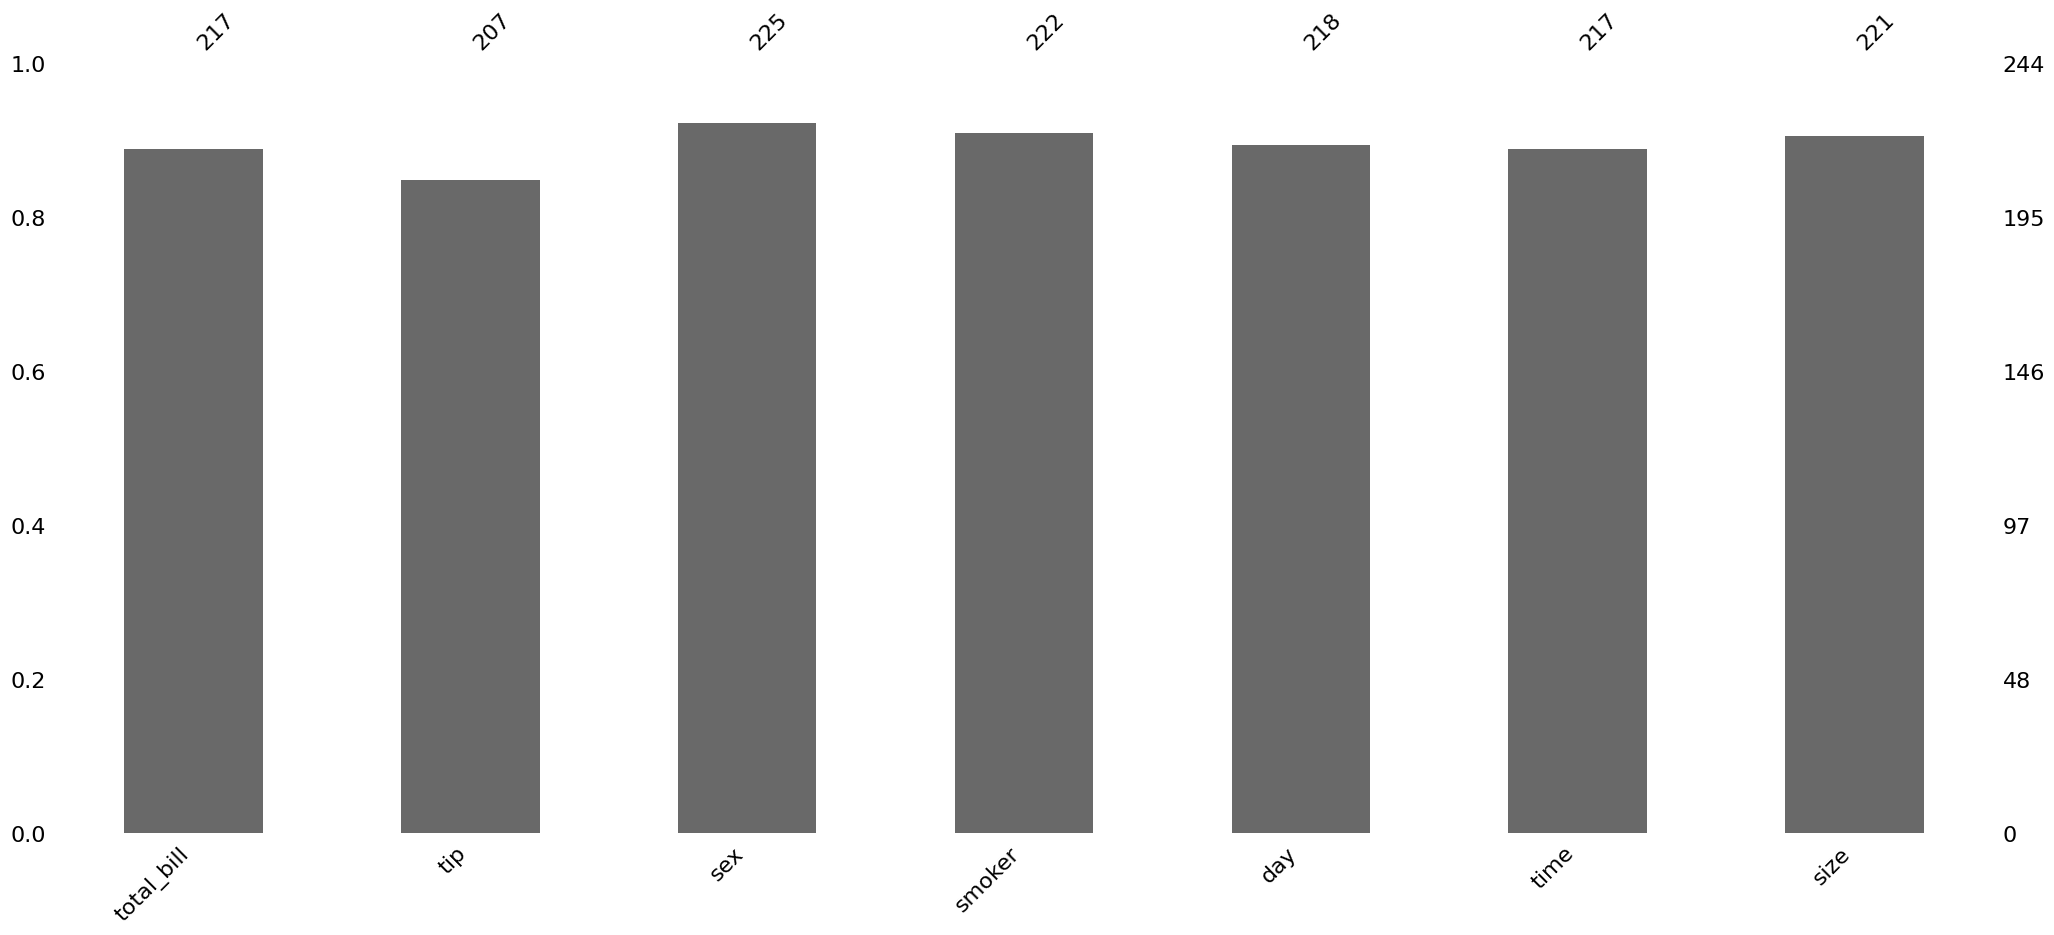

In [10]:
import missingno as msno

np.random.seed(42)

# Copiamos el dataframe original para no modificarlo
df_with_missing = df.copy()

# Vamos a introducir valores perdidos en un 10% de los datos
for column in df_with_missing.columns:
    mask = np.random.random(len(df_with_missing)) < 0.1
    df_with_missing.loc[mask, column] = np.nan

# Volvemos a mostrar los datos perdidos por columna
print("Numero de valores perdidos por columna:")
print(df_with_missing.isna().sum())

msno.bar(df_with_missing) # Gráfico de barras

<Axes: >

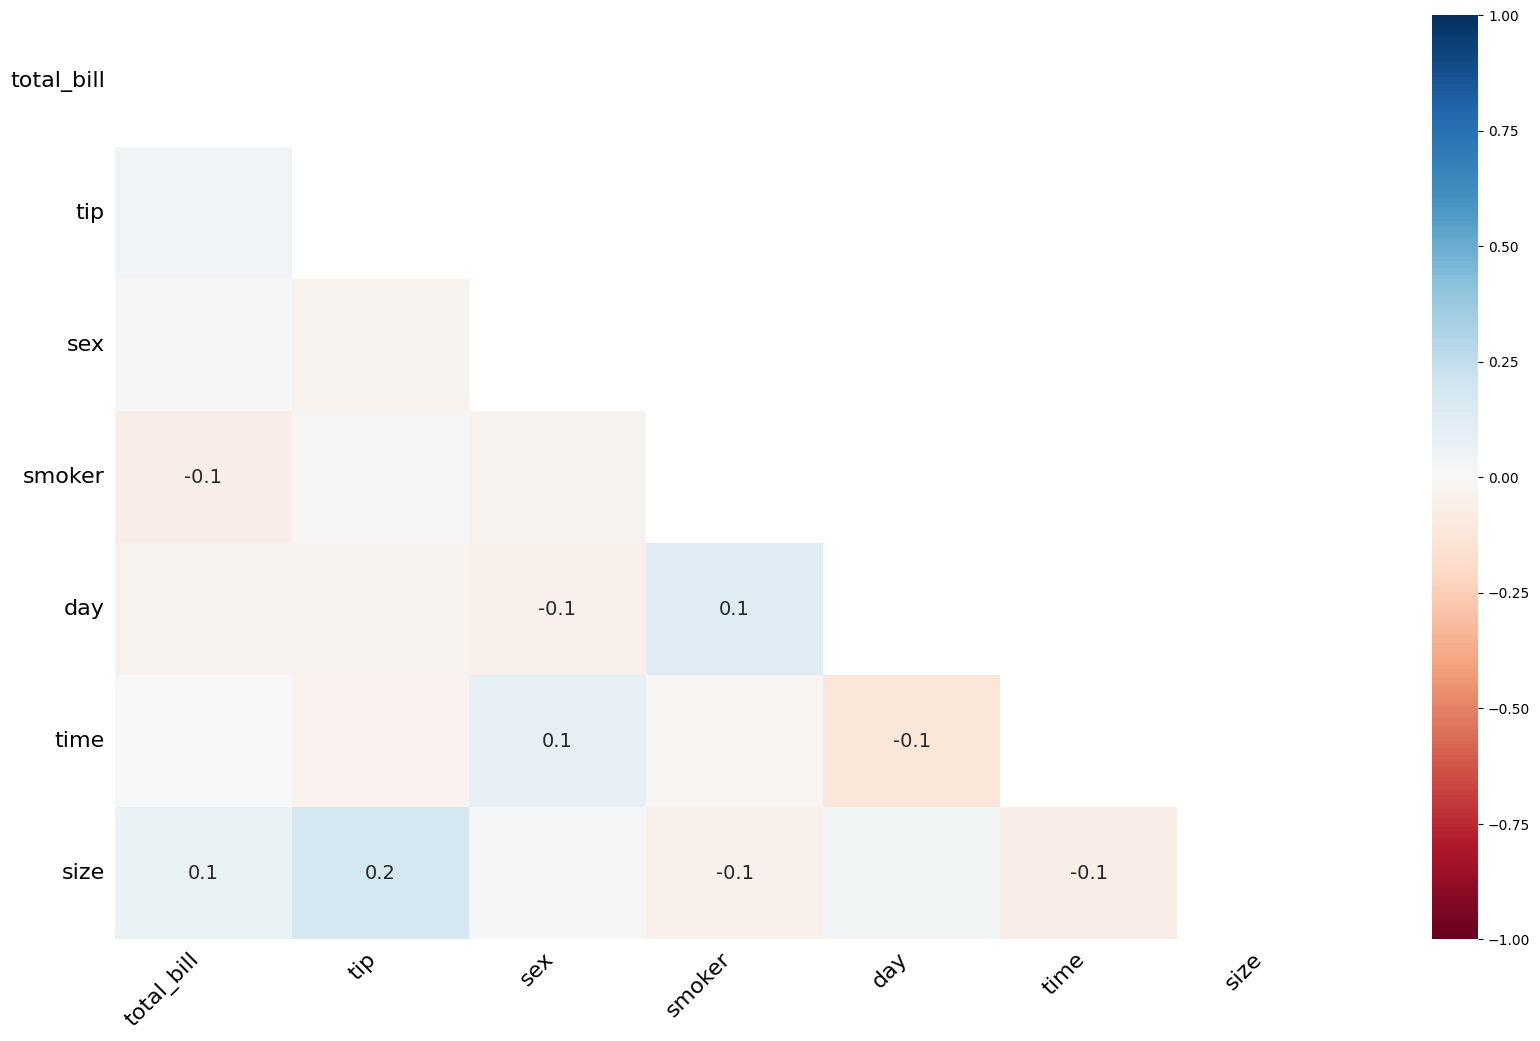

In [11]:
msno.heatmap(df_with_missing)

# Correlaciones

In [12]:
df.corr(method = 'pearson', numeric_only = True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [13]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['total_bill'], df['tip'])

print(round(corr, 2))
print(p_value)

0.68
6.692470646863714e-34
